## Ticket 1: Data Cleaning and Preparation

In [8]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load Dataset
path = r"C:\Users\Mteto\Desktop\Python exercise\Beginner level projects\Amazon Top 50 Bestselling Books\bestsellers with categories.csv"
Book_df = pd.read_csv(path)
# Create a copy
df = Book_df.copy()
# expand all columns
# pd.set_option('display.max_columns', None)

In [10]:
# Analyse the first few lines of dataset
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [11]:
# Analyse the last 5 column of dataset
df.tail(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [12]:
# Check for and handle missing values
# In this dataset there no missing values
# This good as will ensure correct analysis
df.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [13]:
# check for duplicated rows
# using .any() function will result in boolean to check
df.duplicated().any()

False

In [14]:
# how drop duplicated row if any
# df.drop_duplicates(inplace=True)

In [15]:
# Check for duplicated column - create a copy memory cost
# df.T.duplicated().any()
# directly check is efficient
df.duplicated(subset=df.columns).any()

False

In [16]:
# how to drop duplicated columns
# we can use inplace parameter as this column and not a row
# df.drop_duplicates(axis=1, inplace=True) - convenient and efficient
# df = df.T.drop_duplicated().T - Flexibility

In [17]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


## Ticket 2: Descriptive Statistics

In [18]:
# Descreptive Ananalysis: Reviews, Price, Year
df[['User Rating','Reviews','Price']].describe().round(2)

,User Rating,Reviews,Price
count,550.00,550.00,550.00
mean,4.62,11953.28,13.10
std,0.23,11731.13,10.84
min,3.30,37.00,0.00
25%,4.50,4058.00,7.00
50%,4.70,8580.00,11.00
75%,4.80,17253.25,16.00
max,4.90,87841.00,105.00


## Distribution Analysis to understand the spread and shape of data, identifying patterns, central tendency, dispersion, and outliers within a dataset.

In [19]:
df.head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


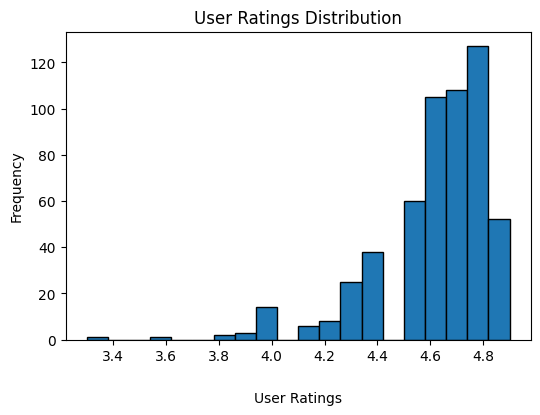

In [20]:
plt.figure(figsize=(6,4))
plt.hist(df['User Rating'], bins=20, edgecolor='black')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.title('User Ratings Distribution')
plt.xlabel('User Ratings', labelpad=20)
plt.show()


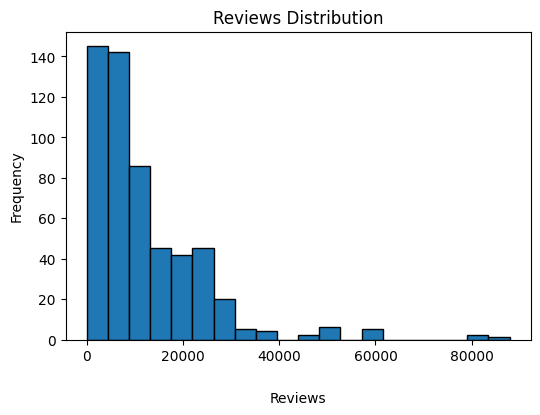

In [21]:
plt.figure(figsize=(6,4))
plt.hist(df['Reviews'], bins=20, edgecolor='black')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.xlabel('Reviews', labelpad=20)
plt.title('Reviews Distribution')
plt.show()

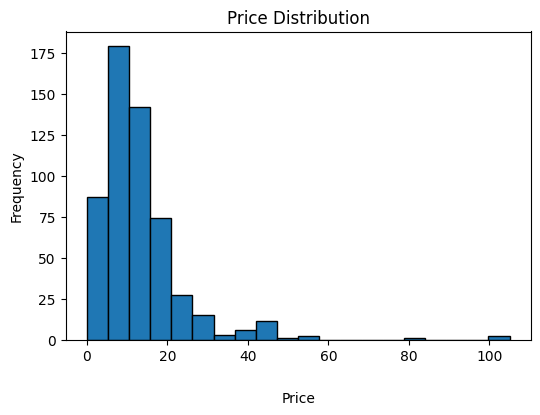

In [22]:
plt.figure(figsize=(6,4))
plt.hist(df['Price'], bins=20, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.xlabel('Price', labelpad=20)
plt.show()

## Category analysis aims to understand the distribution and frequency of different categories, identify patterns and trends within categories, and compare categories to assess their relative performance.

In [23]:
df.head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


In [24]:
# Convert Year column datatype.

df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# groupby column Genre and Year
genre_year_counts = df.groupby(['Genre', df['Year'].dt.year]).size().unstack().fillna(0).sort_index()
genre_year_counts

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Genre,,,,,,,,,,,
Fiction,24,20,21,21,24,29,17,19,24,21,20
Non Fiction,26,30,29,29,26,21,33,31,26,29,30


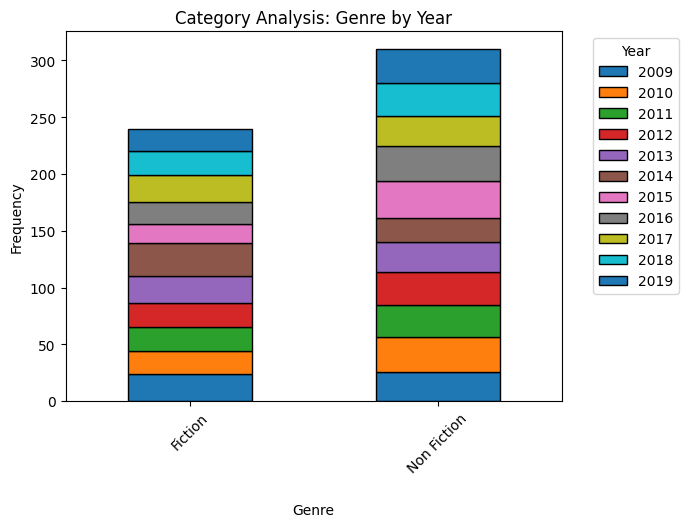

In [25]:
# Plot chart


genre_year_counts.plot(kind='bar', stacked=True, edgecolor='black')

plt.title('Category Analysis: Genre by Year')
plt.ylabel('Frequency')
plt.xlabel('Genre', labelpad=20)
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Ticket 3: Exploratory Data Analysis: Trend Analysis, Correlation Analysis and Grouped Analysis


###  1. Trend Analysis:

In [26]:
df.head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016-01-01,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011-01-01,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018-01-01,Non Fiction


In [27]:
# Price trends over the year
df.set_index('Year', inplace=True)
# resample data by Year and sum price 
Prince_trend = df.resample('Y')['Price'].sum().round()
Prince_trend

Year
2009-12-31    770
2010-12-31    674
2011-12-31    755
2012-12-31    765
2013-12-31    730
2014-12-31    732
2015-12-31    521
2016-12-31    659
2017-12-31    569
2018-12-31    526
2019-12-31    504
Freq: A-DEC, Name: Price, dtype: int64

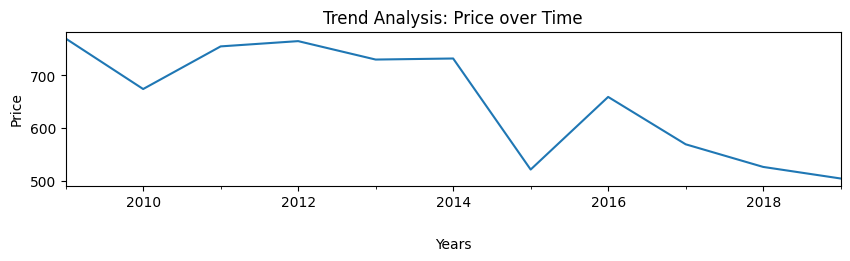

In [28]:
plt.figure(figsize=(10,2))
Prince_trend.plot(kind='line')
plt.title('Trend Analysis: Price over Time')
plt.xlabel('Years')
plt.ylabel('Price')
plt.xlabel('Years', labelpad=20)
plt.show()

<Figure size 1000x200 with 0 Axes>

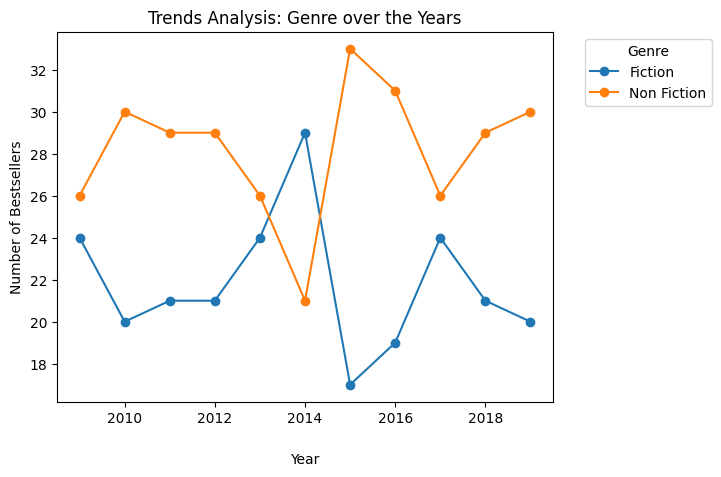

In [29]:
# Reset the index to ensure 'Year' is accessible and not index
df.reset_index(inplace=True)

# Convert 'Year' column to datetime 
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Group the data by year and genre
genre_counts = df.groupby([df['Year'].dt.year, 'Genre']).size().unstack()

# Plot the trends
plt.figure(figsize=(10, 2))
genre_counts.plot(kind='line', marker='o')
plt.title('Trends Analysis: Genre over the Years')
plt.xlabel('Year')
plt.xlabel('Year', labelpad=20)
plt.ylabel('Number of Bestsellers')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [30]:
df.head(2)

,Year,Name,Author,User Rating,Reviews,Price,Genre
0,2016-01-01,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,2011-01-01,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction


### 2. Correlation Analysis 

Text(0.5, 1.0, 'Correlation Matrix of User Rating, Reviews, Price')

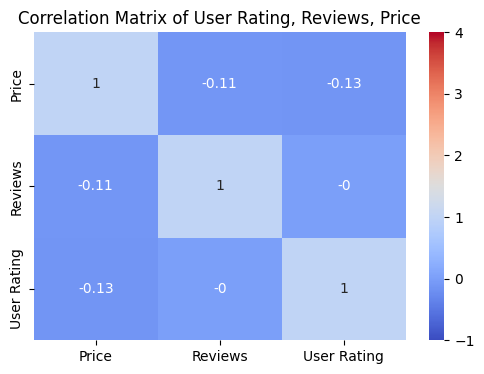

In [31]:
# Heatmap: To show the correlation matrix
correlations_analysis = df[['Price', 'Reviews','User Rating']].corr().round(2)

# plot chart
plt.figure(figsize=(6,4))
sns.heatmap(correlations_analysis.round(2), annot=True, vmin=-1, vmax=4, cmap='coolwarm')
plt.title('Correlation Matrix of User Rating, Reviews, Price')

Text(0.5, 0, 'Reviews')

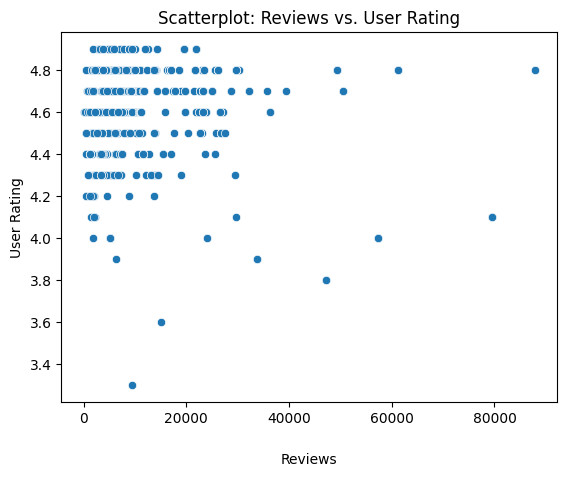

In [32]:
# Scatterplot: Reviews vs User Ratings
sns.scatterplot(data=df, x='Reviews', y='User Rating')

plt.title('Scatterplot: Reviews vs. User Rating')
plt.xlabel('Reviews')
plt.ylabel('User Rating')
plt.xlabel('Reviews', labelpad=20)

### 3. Grouped Analysis

In [33]:
df.head(3)

,Year,Name,Author,User Rating,Reviews,Price,Genre
0,2016-01-01,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,Non Fiction
1,2011-01-01,11/22/63: A Novel,Stephen King,4.6,2052,22,Fiction
2,2018-01-01,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,Non Fiction


#### Genre Analysis:


Text(0.5, 0, 'Genre')

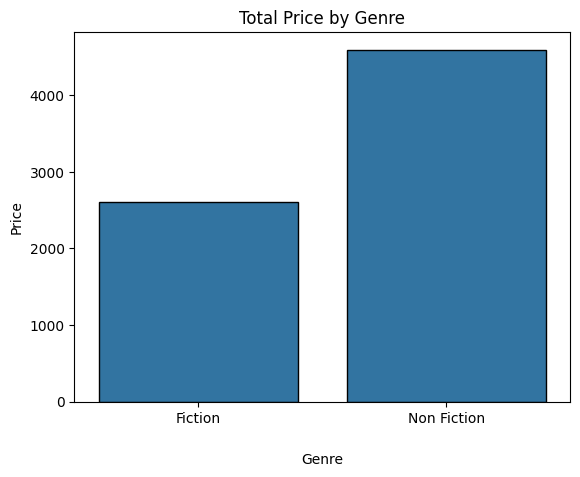

In [34]:
# Bar Plot to visulize frequency distributions

Genre_analysis = df.groupby('Genre').agg({'Price': 'sum'}).reset_index()

# Plot Chart
sns.barplot(data=Genre_analysis, x='Genre', y='Price', edgecolor='black')
plt.title('Total Price by Genre')
plt.xlabel('Genre')
plt.ylabel('Price')
plt.xlabel('Genre', labelpad=20)

In [35]:
df['Author'].count()

550

#### Authors Analysis: Bar Plot

In [36]:
# Groupby Author over User Ratings
Top_author_analysis = df.groupby('Author').agg({'User Rating': 'sum'})

# sort out the list in desceninding order
Top_author_analysis = Top_author_analysis.sort_values(by=['User Rating'], ascending=False).head(50)

# reset index in chronological value
Top_author_analysis = Top_author_analysis.reset_index()


C:\Users\Mteto\AppData\Local\Temp\ipykernel_12396\1908982135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Author', y='User Rating', data=Top_author_analysis, palette='viridis')


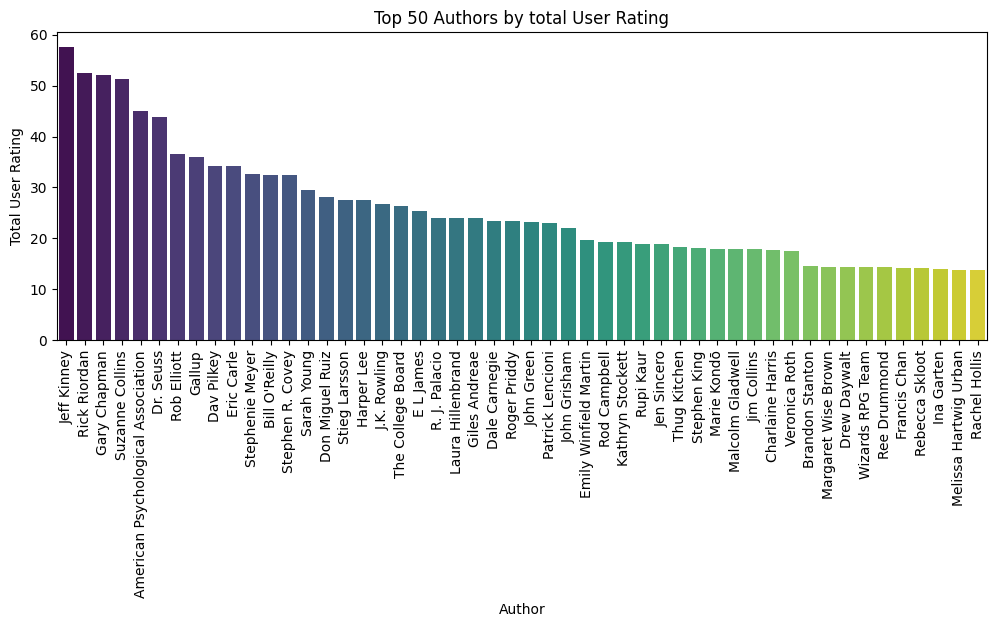

In [37]:
# plot chart 
plt.figure(figsize=(12, 4))
sns.barplot(x='Author', y='User Rating', data=Top_author_analysis, palette='viridis')
plt.xlabel('Author')
plt.ylabel('Total User Rating')
plt.title('Top 50 Authors by total User Rating')
plt.xticks(rotation=90)  
plt.show()

In [38]:
# Groupby Author over User Ratings
Reveiws_author_analysis = df.groupby('Author').agg({'Reviews': 'sum'})

# sort out the list in desceninding order
Reveiws_author_analysis = Reveiws_author_analysis.sort_values(by=['Reviews'], ascending=False).head(50)

# reset index in chronological value
Reveiws_author_analysis = Reveiws_author_analysis.reset_index()

C:\Users\Mteto\AppData\Local\Temp\ipykernel_12396\3422394072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Author', y='Reviews', data=Reveiws_author_analysis, palette='viridis')


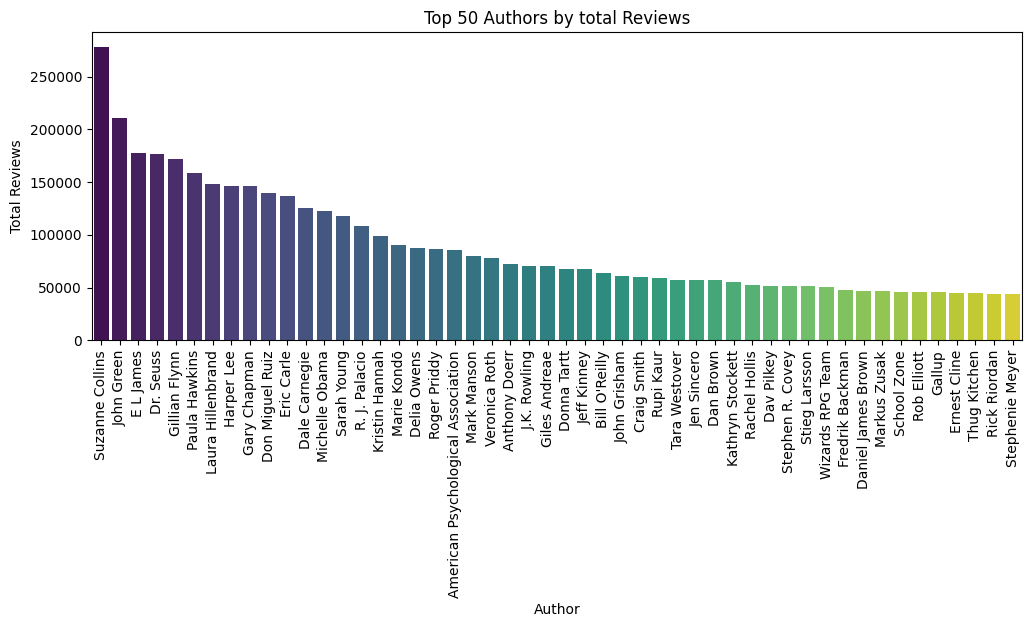

In [39]:
# plot chart 
plt.figure(figsize=(12, 4))
sns.barplot(x='Author', y='Reviews', data=Reveiws_author_analysis, palette='viridis')
plt.xlabel('Author')
plt.ylabel('Total Reviews')
plt.title('Top 50 Authors by total Reviews')
plt.xticks(rotation=90)  
plt.show()

####  Price Analysis: Box Plots 


Text(0.5, 0, 'Genre')

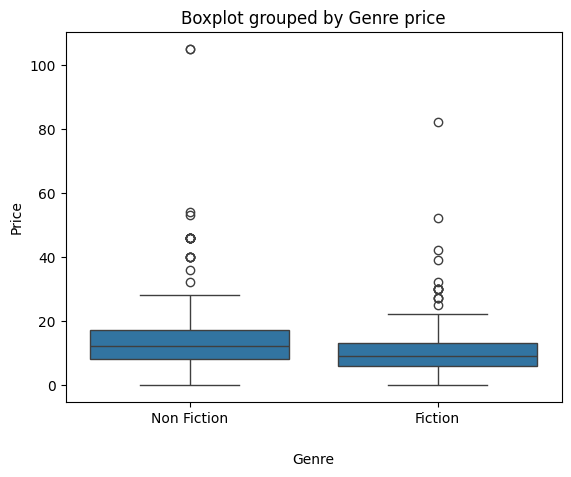

In [40]:
sns.boxplot(x='Genre', y='Price', data=df)
plt.title('Boxplot grouped by Genre price')
plt.xlabel('Genre')
plt.ylabel('Price')
plt.xlabel('Genre', labelpad=20)

####  User Rating Analysis: Density Plot


Text(0, 0.5, 'Frequency')

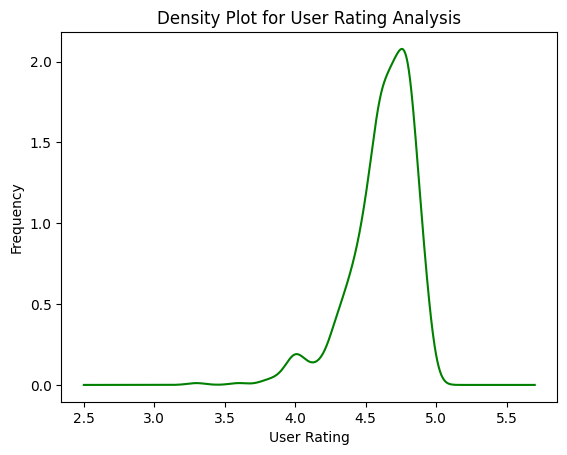

In [41]:
# Density plots for user ratings
df['User Rating'].plot.density(color='green')
plt.title('Density Plot for User Rating Analysis')
plt.xlabel('User Rating')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

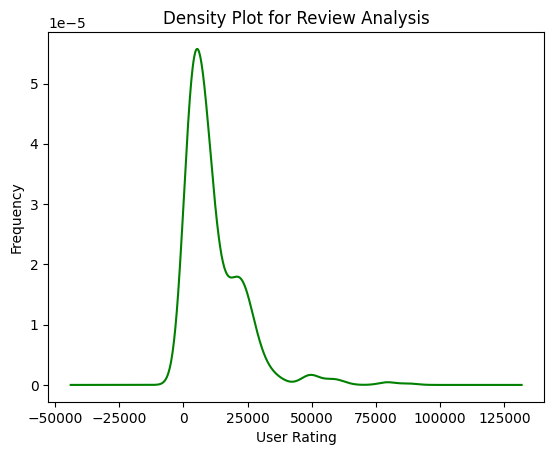

In [42]:
# Density plots for user ratings
df['Reviews'].plot.density(color='green')
plt.title('Density Plot for Review Analysis')
plt.xlabel('User Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

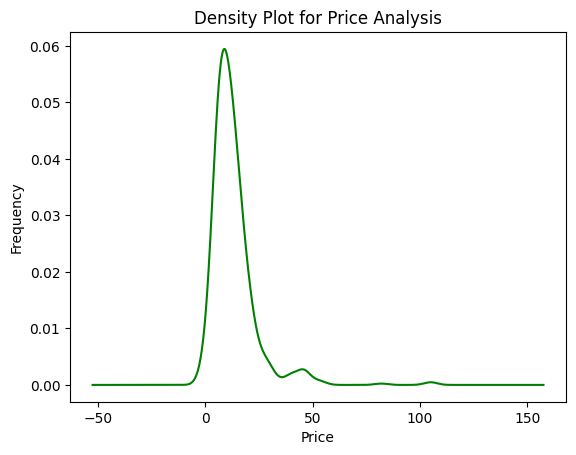

In [43]:
# Density plots for user ratings
df['Price'].plot.density(color='green')
plt.title('Density Plot for Price Analysis')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [44]:
df.to_excel('cleaned_data_Bestsellers.xlsx', index=False)